<a href="https://colab.research.google.com/github/cagdas-aksoy7/DSA-210-Project/blob/main/mainsource.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  DSA PROJECT ABOUT EXAM PERIODS


So first,in these code blocks, my aim is to investigate my exam periods.In these exam periods,what are my physical activity,what are my youtube watch preferences?By looking at these ı want to state the hypothesis to start this investigation:

My hypothesis is that during exam periods, my physical activity decreases, and my YouTube watching preferences shift towards more educational content compared to non-exam periods.

Firstly,I read the data from corresponding files for searching my youtube usage and step count.


In [107]:
import json
import pandas as pd

# downloading json data
with open('watch history.json', 'r', encoding='utf-8') as file:
    youtube_data = json.load(file)

# extracting necessary informations
data = []
for item in youtube_data:
    if 'time' in item:
        data.append({
            'Date': item['time'],  # Tarih
            'Title': item.get('title', 'No Title'),  # Video başlığı
            'Channel': item.get('subtitles', [{'name': 'Unknown'}])[0]['name'] if 'subtitles' in item else 'Unknown'
        })

# converting to the dataframe
youtube_df = pd.DataFrame(data)

# converting date to datetime
youtube_df['Date'] = pd.to_datetime(youtube_df['Date'], format='ISO8601', errors='coerce')

# viewing first couple lines
print(youtube_df.head())


                              Date  \
0 2024-12-25 14:34:54.768000+00:00   
1 2024-12-25 12:09:29.587000+00:00   
2 2024-12-25 10:34:52.522000+00:00   
3 2024-12-25 10:34:10.927000+00:00   
4 2024-12-25 10:34:01.314000+00:00   

                                               Title         Channel  
0  Karadenizli Ja Morant, Tek Büyük Kural, En Hız...  Socrates Dergi  
1  E-Ticaret Yapanlar! Masada Para Bırakmayın 💸 |...     Kolay Değil  
2  Bir Kelime Hayatınızı Değiştirebilir! 👀 | Kısa...     Kolay Değil  
3  Chery’yi Sanayiye Götürüp Ustalara Gösterdik! ...     Doğan Kabak  
4  Kobe Bryant'ın Ardından... I Kaan Kural-İnan Ö...  Socrates Dergi  


Then,I selected the exam time as 10-17 November since I had
a several exams in this period for this Fall Semester.

After that for the non-exam period.I selected the random period which ı had not exam in that period.







In [108]:
import pandas as pd
import random

# Exam period (2024 Fall Semester)
exam_start = pd.to_datetime('2024-11-10').date()
exam_end = pd.to_datetime('2024-11-17').date()

# Convert the Date column to datetime and extract only the date
youtube_df['Date'] = pd.to_datetime(youtube_df['Date']).dt.date

# Determine exam and non-exam periods
youtube_df['Period'] = youtube_df['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam'
)

# Create a list of dates within the last 3 months that are non-exam days
non_exam_dates = youtube_df[youtube_df['Period'] == 'Non-Exam']['Date'].unique()

# Select a random week for the non-exam period
random_start_date = random.choice(non_exam_dates)
random_start_date = pd.to_datetime(random_start_date).date()

# Define the end date of the randomly selected week
random_end_date = random_start_date + pd.Timedelta(days=6)

# Create a new "Adjusted Period" column
youtube_df['Adjusted Period'] = youtube_df['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else
              ('Non-Exam' if random_start_date <= x <= random_end_date else 'Exclude')
)

# Check the total number of videos for each adjusted period
print(youtube_df['Adjusted Period'].value_counts())

# Check the randomly selected non-exam week
print(f"Selected Non-Exam Week: {random_start_date} to {random_end_date}")

# Filter data to include only "Exam" and "Non-Exam" periods
filtered_df = youtube_df[youtube_df['Adjusted Period'].isin(['Exam', 'Non-Exam'])]
print(filtered_df.head())



Adjusted Period
Exclude     25820
Non-Exam      131
Exam           73
Name: count, dtype: int64
Selected Non-Exam Week: 2022-08-22 to 2022-08-28
           Date                                              Title  \
884  2024-11-17  “Cem Yılmaz’a Gülmekten Cümle Kuramadık” | Fua...   
885  2024-11-17  Jordan Peterson - Why it's so Hard to Sit Down...   
886  2024-11-17  Pointer to Structure || Abdul Bari adlı videoy...   
887  2024-11-17  2.6.1 Binary Search Iterative Method adlı vide...   
888  2024-11-17       CS50 / Week 0: Friday adlı videoyu izlediniz   

                     Channel Period Adjusted Period  
884           Socrates Dergi   Exam            Exam  
885    Bite-sized Philosophy   Exam            Exam  
886  k180128 Shaheer Mehmood   Exam            Exam  
887               Abdul Bari   Exam            Exam  
888       Harvard University   Exam            Exam  


For start,ı begun with with my youtube data.I created a line graph to visualize that how many videos ı watched daily. Exam period vs non exam period.By just looking at this visualization,it seems that ı watched more videos in the nonexam period but we should do more visualizations to ensure that.


<ipython-input-109-65e1a6b03a0e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exam_videos['Day'] = range(1, len(exam_videos) + 1)
<ipython-input-109-65e1a6b03a0e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_exam_videos['Day'] = range(1, len(non_exam_videos) + 1)


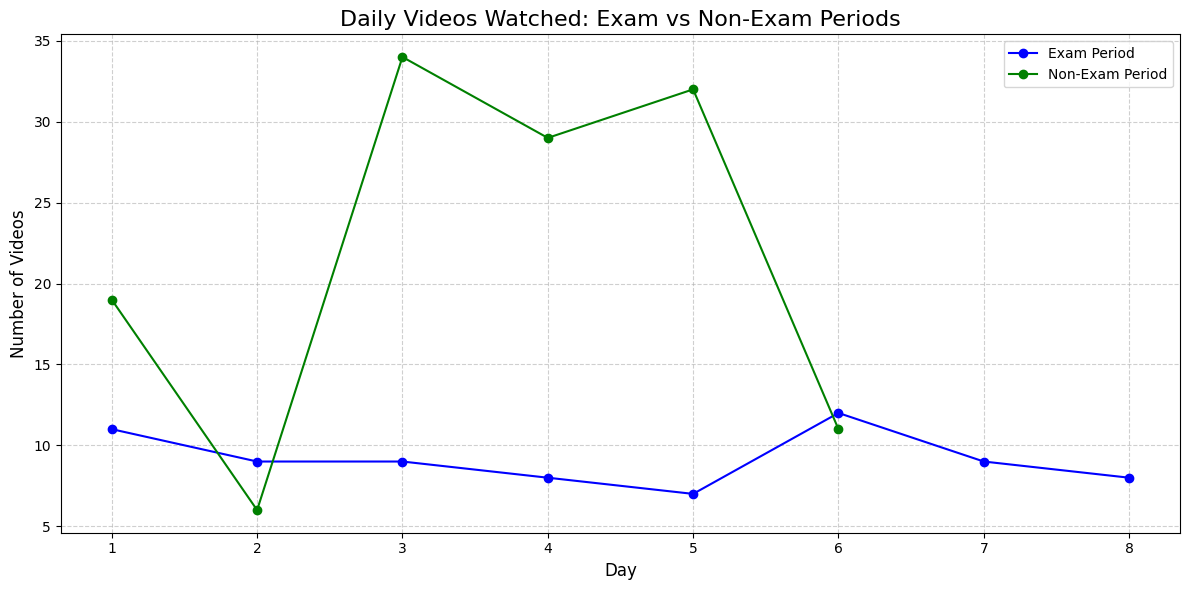

In [109]:
import matplotlib.pyplot as plt

# Filter data to include only "Exam" and "Non-Exam" periods
filtered_df = youtube_df[youtube_df['Adjusted Period'].isin(['Exam', 'Non-Exam'])]

# Calculate daily video counts
daily_video_counts = filtered_df.groupby(['Date', 'Adjusted Period']).size().reset_index(name='Video_Count')

# Separate data for exam and non-exam periods
exam_videos = daily_video_counts[daily_video_counts['Adjusted Period'] == 'Exam']
non_exam_videos = daily_video_counts[daily_video_counts['Adjusted Period'] == 'Non-Exam']

# Create an index to use day numbers instead of specific dates
exam_videos['Day'] = range(1, len(exam_videos) + 1)
non_exam_videos['Day'] = range(1, len(non_exam_videos) + 1)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(exam_videos['Day'], exam_videos['Video_Count'], marker='o', linestyle='-', color='blue', label='Exam Period')
plt.plot(non_exam_videos['Day'], non_exam_videos['Video_Count'], marker='o', linestyle='-', color='green', label='Non-Exam Period')
plt.title('Daily Videos Watched: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Day', fontsize=12)  # X-axis representing the day number
plt.ylabel('Number of Videos', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




For an addition,ı created a boxplot.

<ipython-input-110-6c55848a4364>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Adjusted Period', y='Video_Count', data=daily_video_counts, palette='coolwarm')


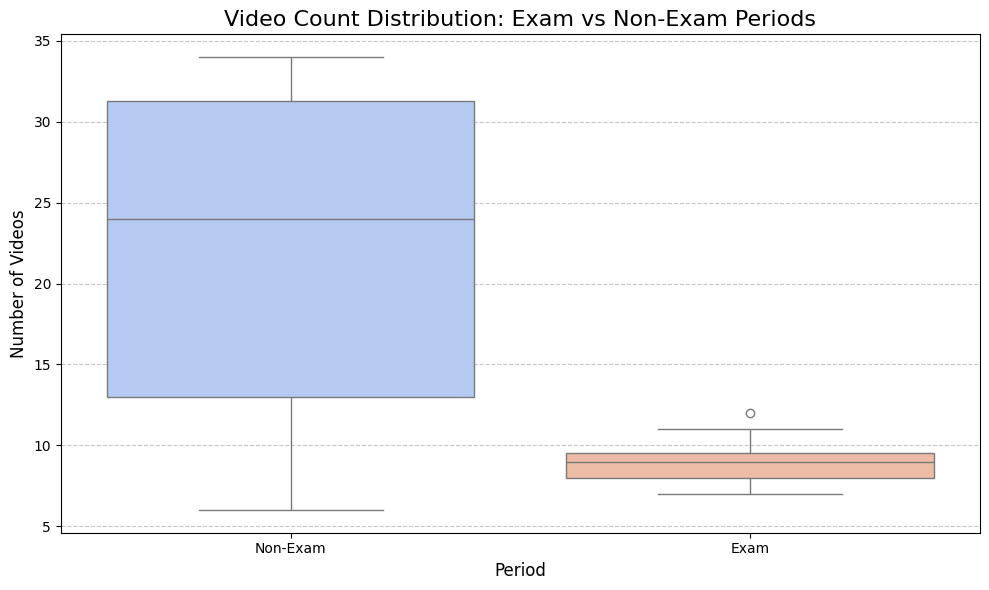

In [110]:
import matplotlib.pyplot as plt  # Eksik olan kütüphane import edildi
import seaborn as sns

# Create a box plot for daily video counts
plt.figure(figsize=(10, 6))
sns.boxplot(x='Adjusted Period', y='Video_Count', data=daily_video_counts, palette='coolwarm')
plt.title('Video Count Distribution: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Number of Videos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Then,ı wonder that what are these videos?In other words,what channels did ı watch when ı have an exam this week?Does this trend change when ı swtiched it to non-exam period ?
```

```



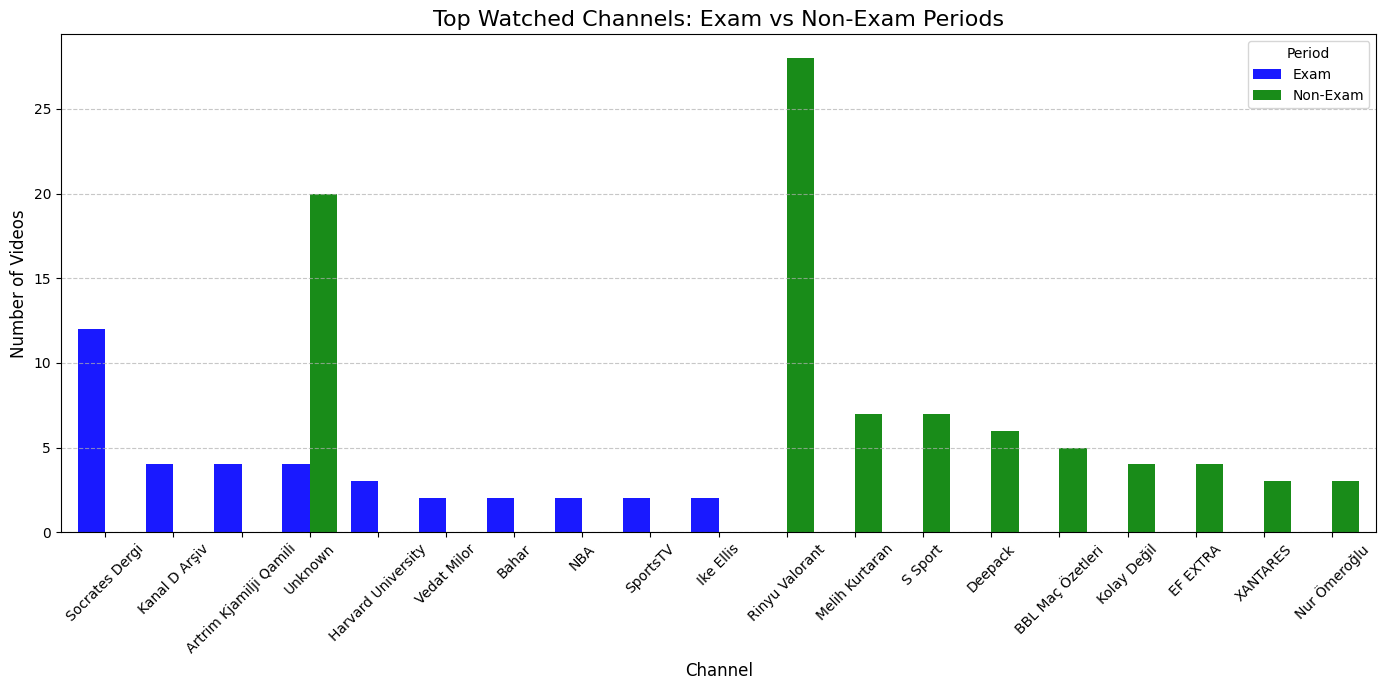

In [111]:

import pandas as pd
import matplotlib.pyplot as plt

# Filter Exam and Non-Exam periods
exam_channels = filtered_df[filtered_df['Adjusted Period'] == 'Exam']['Channel'].value_counts().head(10)
non_exam_channels = filtered_df[filtered_df['Adjusted Period'] == 'Non-Exam']['Channel'].value_counts().head(10)

# Combine Exam and Non-Exam data into a single DataFrame
top_channels = pd.concat([exam_channels, non_exam_channels], axis=1, keys=['Exam', 'Non-Exam']).fillna(0)

# Plot the top watched channels
top_channels.plot(kind='bar', figsize=(14, 7), width=0.8, alpha=0.9, color=['blue', 'green'])
plt.title('Top Watched Channels: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Number of Videos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Period')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



It seems that there is no big shift in channel type.In other words,ı do not change the type of content ı am consuming.



For better understanding the channels,ı created the pie-chart which shows to channels that ı watched inexam period

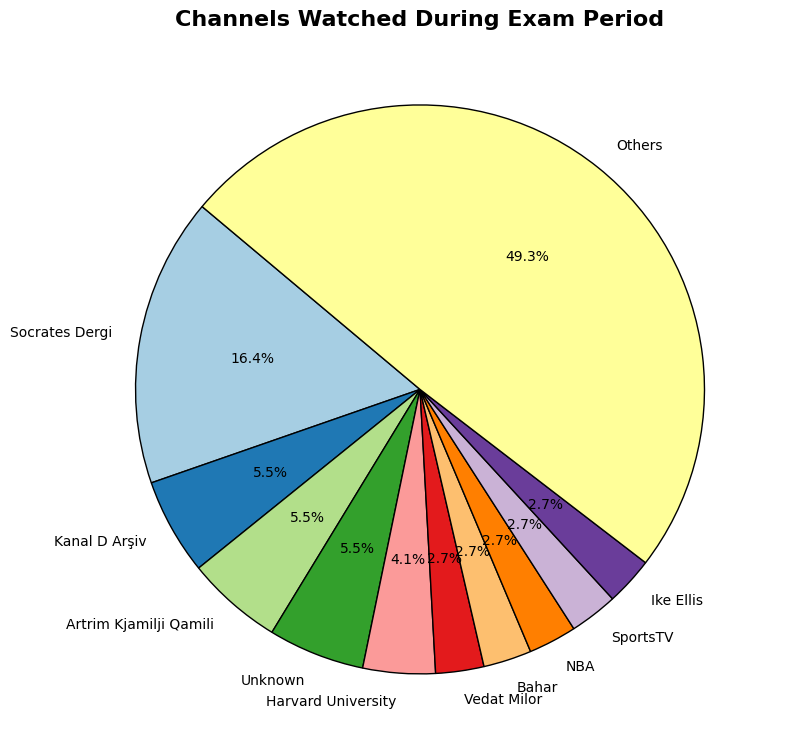

In [112]:
import matplotlib.pyplot as plt

# Filter data for the exam period
exam_channels = filtered_df[filtered_df['Adjusted Period'] == 'Exam']['Channel']

# Count the occurrences of each channel
channel_counts = exam_channels.value_counts()

# Select top N channels (e.g., top 10) and group the rest as 'Others'
top_n = 10
if len(channel_counts) > top_n:
    top_channels = channel_counts[:top_n]
    others = channel_counts[top_n:].sum()
    top_channels['Others'] = others
else:
    top_channels = channel_counts

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_channels,
    labels=top_channels.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors[:len(top_channels)],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Channels Watched During Exam Period', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


Then,ı created the same for non-exam period.

Note:Others are the channels that that ı watched not regularly(i.e, these are not the channels that in my top 10 watched channels.)

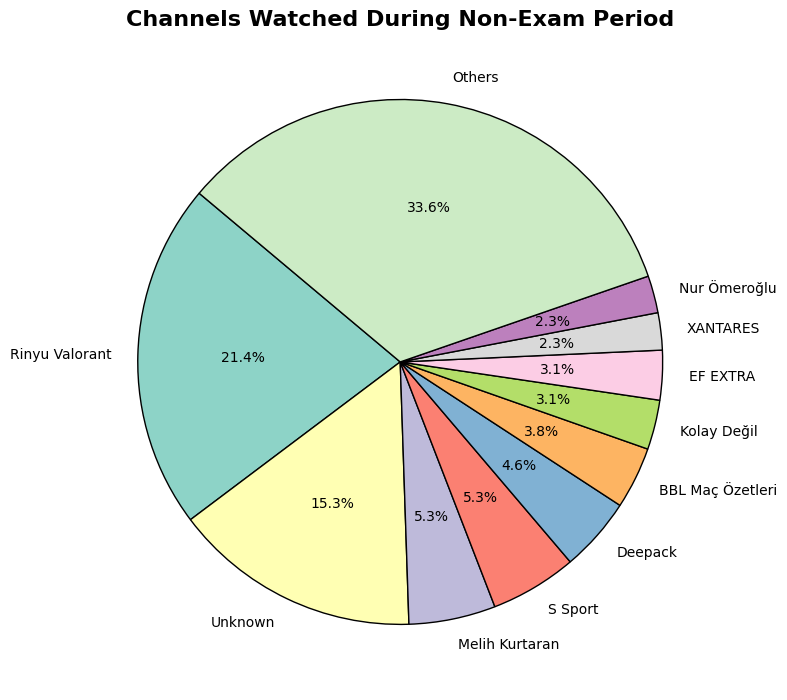

In [113]:
import matplotlib.pyplot as plt

# Filter data for the non-exam period
non_exam_channels = filtered_df[filtered_df['Adjusted Period'] == 'Non-Exam']['Channel']

# Count the occurrences of each channel
channel_counts = non_exam_channels.value_counts()

# Select top N channels (e.g., top 10) and group the rest as 'Others'
top_n = 10
if len(channel_counts) > top_n:
    top_channels = channel_counts[:top_n]
    others = channel_counts[top_n:].sum()
    top_channels['Others'] = others
else:
    top_channels = channel_counts

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_channels,
    labels=top_channels.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors[:len(top_channels)],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Channels Watched During Non-Exam Period', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


This is the heatmap and it shows to entartainment content that ı consume.It seems that it is very very low.

<ipython-input-114-68ea3522b105>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Category'] = filtered_df['Title'].apply(


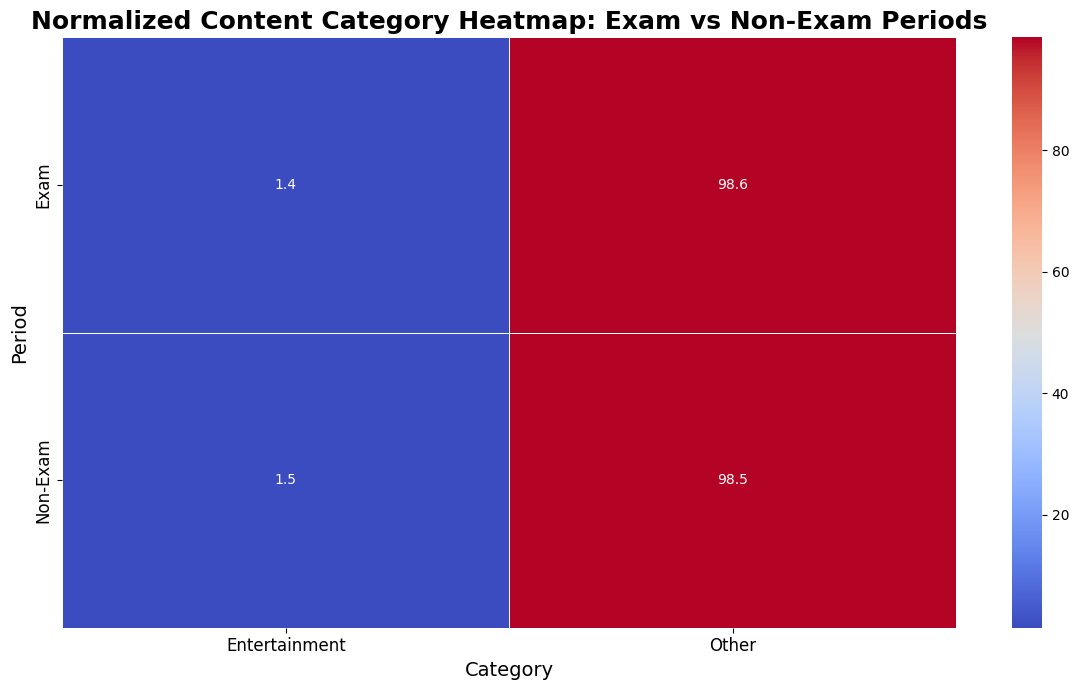

In [114]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to include only Exam and Non-Exam periods
filtered_df = youtube_df[youtube_df['Adjusted Period'].isin(['Exam', 'Non-Exam'])]

# Expand the categorization conditions for better distribution
filtered_df['Category'] = filtered_df['Title'].apply(
    lambda x: 'Educational' if any(word in x.lower() for word in ['tutorial', 'lecture', 'course']) else
              'Entertainment' if any(word in x.lower() for word in ['funny', 'vlog', 'movie', 'show']) else
              'Other'
)

# Transform the distribution of categories in Exam and Non-Exam periods into a pivot table
category_heatmap_data = filtered_df.groupby(['Adjusted Period', 'Category']).size().unstack(fill_value=0)

# Normalize the data by row totals
category_heatmap_normalized = category_heatmap_data.div(category_heatmap_data.sum(axis=1), axis=0) * 100

# Create the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(category_heatmap_normalized, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Normalized Content Category Heatmap: Exam vs Non-Exam Periods', fontsize=18, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Period', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



From the heatmap, it is evident that the 'Other' category dominates both Exam and Non-Exam periods, comprising over 98% of the content consumed. In contrast, the 'Entertainment' category shows minimal engagement, indicating a lack of preference for such content during these periods.

From now on, ı started the look at my apple health data.I exported the step count information and did some visualizations from it to understand my behaviour int the exam times versus non exam times.

---






Firstly,to be a sample, ı create a table and ı seperate the step counts as exam period versus non exam period with tabulate method the see a clear version of output.

In [116]:
from tabulate import tabulate
import xml.etree.ElementTree as ET
import pandas as pd

# Load XML data
tree = ET.parse('export.xml')
root = tree.getroot()

# Extract only Step Count records
step_data = []
for record in root.findall('Record'):
    if record.attrib.get('type') == 'HKQuantityTypeIdentifierStepCount':  # Step count data
        step_data.append({
            'Date': record.attrib['startDate'][:10],  # Date (yyyy-mm-dd)
            'Steps': float(record.attrib['value'])  # Step count
        })

# Convert to DataFrame
steps_df = pd.DataFrame(step_data)

# Convert date column to datetime
steps_df['Date'] = pd.to_datetime(steps_df['Date'])

# Calculate daily total steps
daily_steps = steps_df.groupby('Date')['Steps'].sum().reset_index()

# Filter for project-relevant periods (Exam and Non-Exam)
exam_start = pd.to_datetime('2024-11-10')
exam_end = pd.to_datetime('2024-11-17')

# Filter exam period
exam_steps = daily_steps[(daily_steps['Date'] >= exam_start) & (daily_steps['Date'] <= exam_end)]

# Filter a sample non-exam week (e.g., last 3 months)
non_exam_start = pd.to_datetime('2024-08-19')  # Example non-exam week start
non_exam_end = non_exam_start + pd.Timedelta(days=6)
non_exam_steps = daily_steps[(daily_steps['Date'] >= non_exam_start) & (daily_steps['Date'] <= non_exam_end)]

# Combine and rename for clarity
project_steps = pd.concat([exam_steps.assign(Period='Exam'),
                           non_exam_steps.assign(Period='Non-Exam')])

# Sort and reset index
project_steps = project_steps.sort_values(by=['Period', 'Date']).reset_index(drop=True)

# Display clean output using tabulate
print(tabulate(project_steps, headers='keys', tablefmt='grid', showindex=False))

# Optionally save to a CSV for further analysis
project_steps.to_csv('filtered_step_data.csv', index=False)


+---------------------+---------+----------+
| Date                |   Steps | Period   |
+=====================+=========+==========+
| 2024-11-10 00:00:00 |   10236 | Exam     |
+---------------------+---------+----------+
| 2024-11-11 00:00:00 |   11531 | Exam     |
+---------------------+---------+----------+
| 2024-11-12 00:00:00 |    6320 | Exam     |
+---------------------+---------+----------+
| 2024-11-13 00:00:00 |   10696 | Exam     |
+---------------------+---------+----------+
| 2024-11-14 00:00:00 |   11101 | Exam     |
+---------------------+---------+----------+
| 2024-11-15 00:00:00 |   13097 | Exam     |
+---------------------+---------+----------+
| 2024-11-16 00:00:00 |   14061 | Exam     |
+---------------------+---------+----------+
| 2024-11-17 00:00:00 |    5011 | Exam     |
+---------------------+---------+----------+
| 2024-08-19 00:00:00 |    8320 | Non-Exam |
+---------------------+---------+----------+
| 2024-08-20 00:00:00 |    4384 | Non-Exam |
+---------

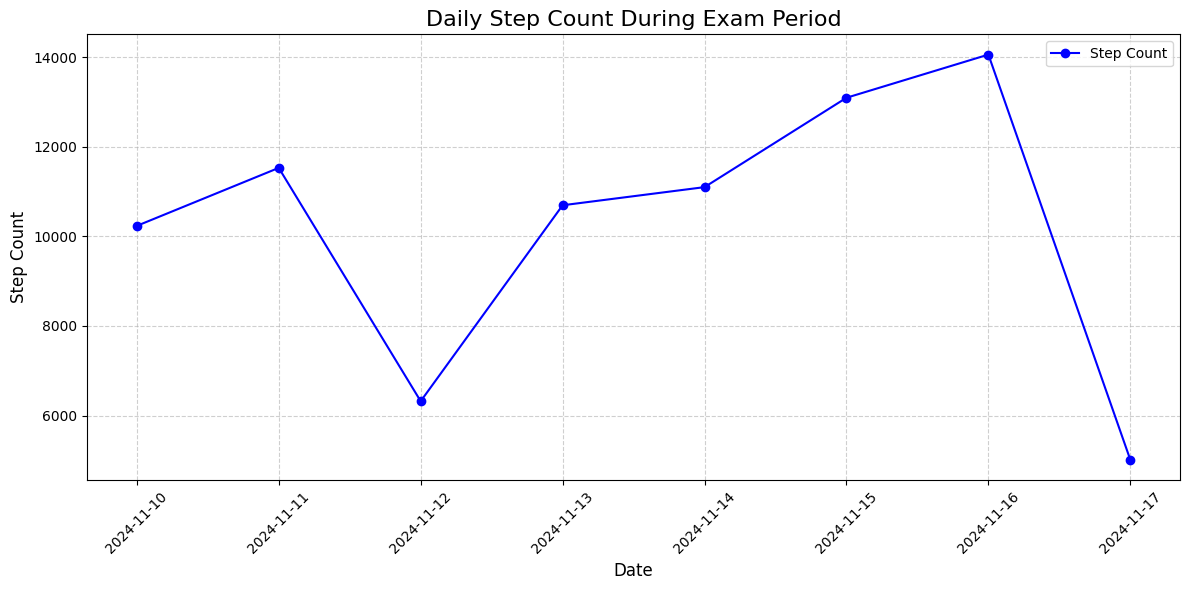

In [121]:
import matplotlib.pyplot as plt

# Filter data for the exam period
exam_steps = daily_steps[daily_steps['Period'] == 'Exam']

# Visualize daily trends
plt.figure(figsize=(12, 6))
plt.plot(exam_steps['Date'], exam_steps['Steps'], marker='o', linestyle='-', color='blue', label='Step Count')
plt.title('Daily Step Count During Exam Period', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Step Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


From these plot,we can see that my step count seems to show non-linear trend.But as we can see,ı have an outlier at "2024-11-16".And this date is exactly the my exam date.It can say something about my stress changes when exams are near.

In [118]:
import random

# Define exam week
exam_start = pd.to_datetime('2024-11-10')
exam_end = pd.to_datetime('2024-11-17')

# Define last 3 months
three_months_ago = daily_steps['Date'].max() - pd.Timedelta(days=90)

# Filter last 3 months data
daily_steps_last_3_months = daily_steps[daily_steps['Date'] >= three_months_ago]

# Select all non-exam dates (outside exam week)
non_exam_dates = daily_steps_last_3_months[
    (daily_steps_last_3_months['Date'] < exam_start) | (daily_steps_last_3_months['Date'] > exam_end)
]['Date'].unique()

# Select a random week from non-exam dates ensuring it's within valid ranges
random_start_date = random.choice(non_exam_dates)
random_start_date = pd.to_datetime(random_start_date)

# Extend to a 2-week range for more robust data
random_end_date = random_start_date + pd.Timedelta(days=13)

# Assign periods
daily_steps['Period'] = daily_steps['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else
              ('Non-Exam' if random_start_date <= x <= random_end_date else 'Exclude')
)

# Check data counts
print(daily_steps['Period'].value_counts())

# Display selected non-exam week
print(f"Selected Non-Exam Period: {random_start_date.date()} to {random_end_date.date()}")


Period
Exclude     2872
Non-Exam      14
Exam           8
Name: count, dtype: int64
Selected Non-Exam Period: 2024-11-28 to 2024-12-11


This time ı tried to compare my step counts in exam period and out of the exam period

<ipython-input-119-f99d7abd6caf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exam_steps['Day'] = range(1, len(exam_steps) + 1)
<ipython-input-119-f99d7abd6caf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_exam_steps['Day'] = range(1, len(non_exam_steps) + 1)


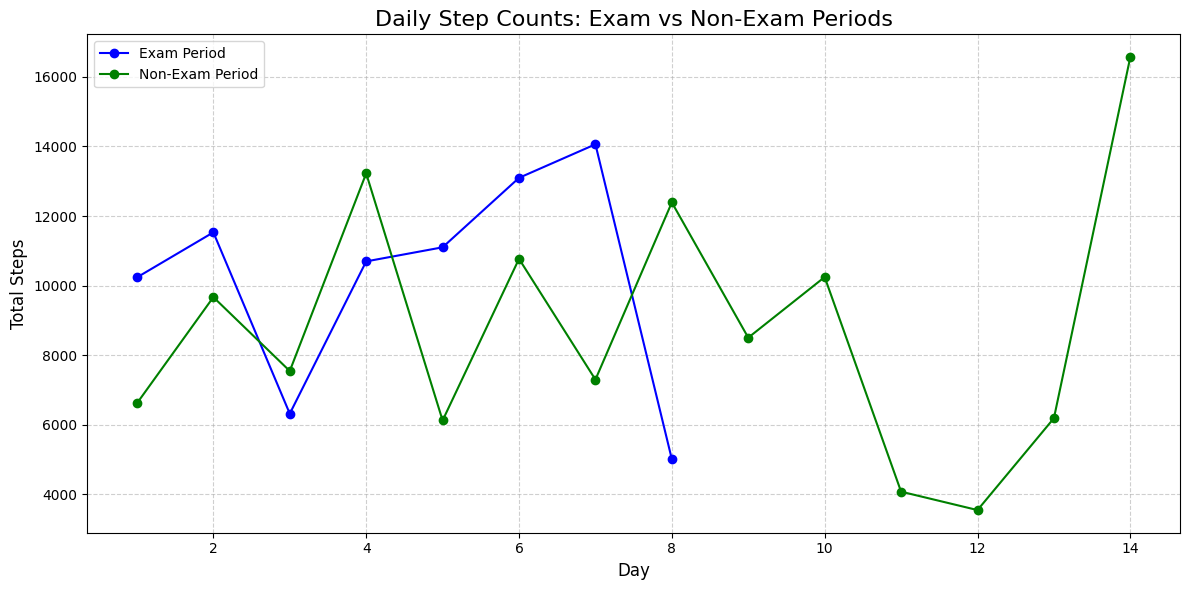

In [119]:
import matplotlib.pyplot as plt

# Filter data to include only Exam and Non-Exam periods
filtered_steps = daily_steps[daily_steps['Period'].isin(['Exam', 'Non-Exam'])]

# Separate data for Exam and Non-Exam periods
exam_steps = filtered_steps[filtered_steps['Period'] == 'Exam']
non_exam_steps = filtered_steps[filtered_steps['Period'] == 'Non-Exam']

# Add day numbers to clean up the date axis
exam_steps['Day'] = range(1, len(exam_steps) + 1)
non_exam_steps['Day'] = range(1, len(non_exam_steps) + 1)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(exam_steps['Day'], exam_steps['Steps'], marker='o', linestyle='-', color='blue', label='Exam Period')
plt.plot(non_exam_steps['Day'], non_exam_steps['Steps'], marker='o', linestyle='-', color='green', label='Non-Exam Period')
plt.title('Daily Step Counts: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Day', fontsize=12)  # X-axis representing the day number
plt.ylabel('Total Steps', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


When we look at the graph,we cannot say that this is a strong correlation.

SCATTER PLOT OF DAILY STEPS


I go further and ı tried to examine my step count by scatter plot.I tried to catch a relationship between them but there seem to be no relationship.

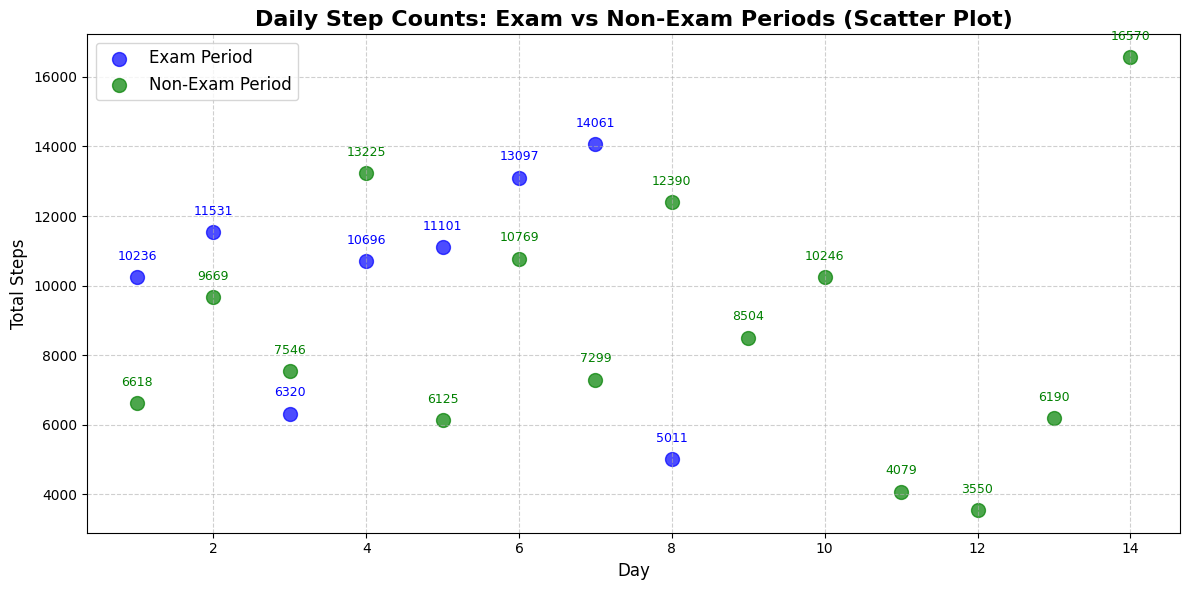

In [120]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(exam_steps['Day'], exam_steps['Steps'], color='blue', label='Exam Period', s=100, alpha=0.7)
plt.scatter(non_exam_steps['Day'], non_exam_steps['Steps'], color='green', label='Non-Exam Period', s=100, alpha=0.7)

# Add plot details
plt.title('Daily Step Counts: Exam vs Non-Exam Periods (Scatter Plot)', fontsize=16, fontweight='bold')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Steps', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

# Optional: Add data point annotations
for i in range(len(exam_steps)):
    plt.text(
        exam_steps['Day'].iloc[i],
        exam_steps['Steps'].iloc[i] + 500,
        f"{int(exam_steps['Steps'].iloc[i])}",
        fontsize=9, ha='center', color='blue'
    )
for i in range(len(non_exam_steps)):
    plt.text(
        non_exam_steps['Day'].iloc[i],
        non_exam_steps['Steps'].iloc[i] + 500,
        f"{int(non_exam_steps['Steps'].iloc[i])}",
        fontsize=9, ha='center', color='green'
    )

plt.tight_layout()
plt.show()



I create a boxplot and indicate the the statistics on the plot.

<ipython-input-76-05d2479b74a0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Period', y='Steps', data=filtered_steps[filtered_steps['Period'].isin(['Exam', 'Non-Exam'])], palette='muted', showfliers=False)


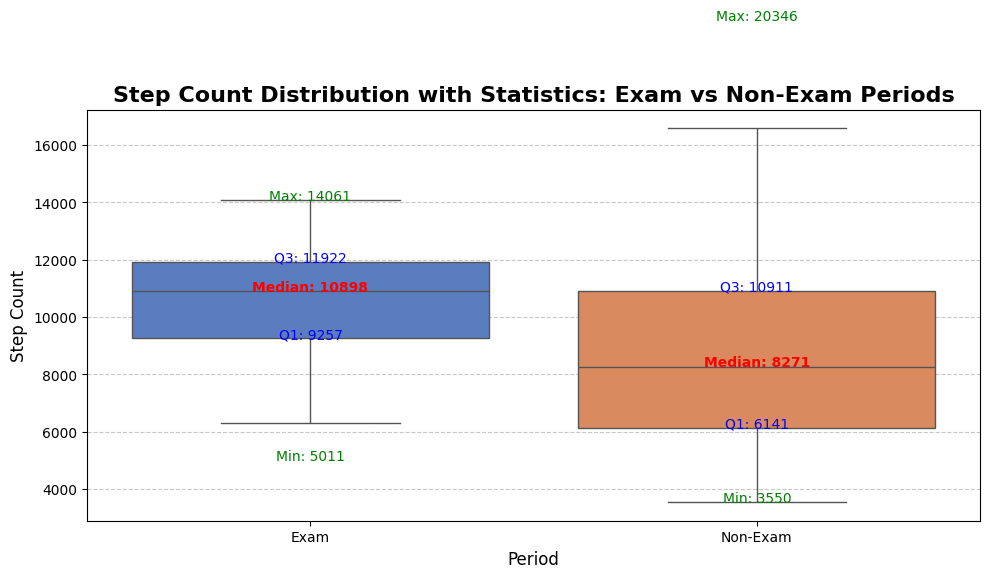

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate statistics for Exam and Non-Exam periods
stats = filtered_steps[filtered_steps['Period'].isin(['Exam', 'Non-Exam'])].groupby('Period')['Steps'].describe()

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Period', y='Steps', data=filtered_steps[filtered_steps['Period'].isin(['Exam', 'Non-Exam'])], palette='muted', showfliers=False)

# Add statistics to the plot
for i, period in enumerate(['Exam', 'Non-Exam']):
    q1 = stats.loc[period, '25%']
    q3 = stats.loc[period, '75%']
    median = stats.loc[period, '50%']
    min_val = stats.loc[period, 'min']
    max_val = stats.loc[period, 'max']

    # Add Q1 and Q3
    plt.text(i, q1, f'Q1: {q1:.0f}', horizontalalignment='center', color='blue', fontsize=10)
    plt.text(i, q3, f'Q3: {q3:.0f}', horizontalalignment='center', color='blue', fontsize=10)
    # Add Median
    plt.text(i, median, f'Median: {median:.0f}', horizontalalignment='center', color='red', weight='bold', fontsize=10)
    # Add Min and Max
    plt.text(i, min_val, f'Min: {min_val:.0f}', horizontalalignment='center', color='green', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.0f}', horizontalalignment='center', color='green', fontsize=10)

# Plot settings
plt.title('Step Count Distribution with Statistics: Exam vs Non-Exam Periods', fontsize=16, fontweight='bold')
plt.xlabel('Period', fontsize=12)
plt.ylabel('Step Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


I also created a violin plot.

<ipython-input-77-052459037fa9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Period', y='Steps', data=filtered_steps[filtered_steps['Period'].isin(['Exam', 'Non-Exam'])], palette='muted', inner=None)
<ipython-input-77-052459037fa9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Period', y='Steps', data=filtered_steps[filtered_steps['Period'].isin(['Exam', 'Non-Exam'])], width=0.2, palette='dark', showfliers=False)


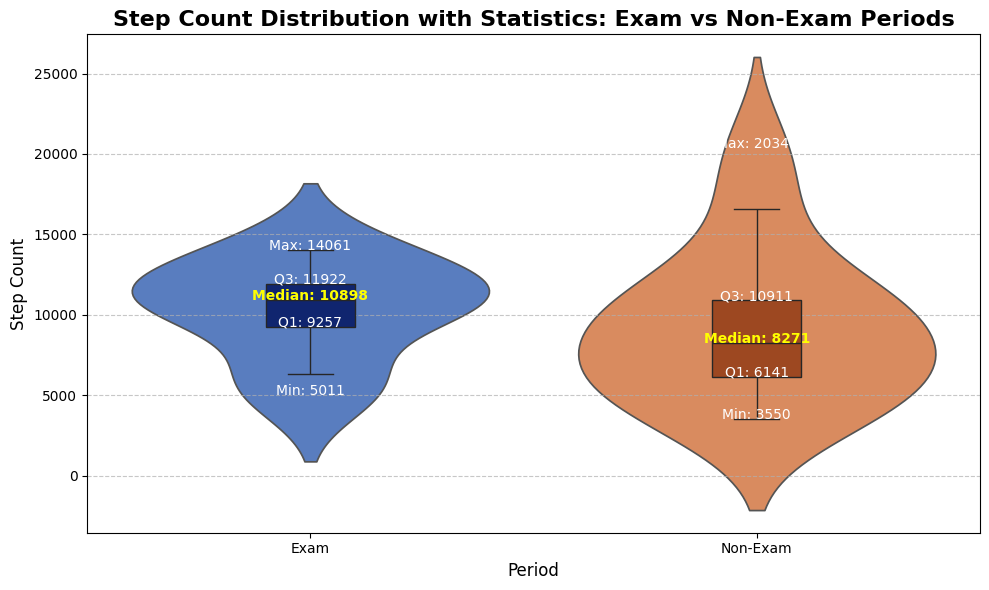

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate statistics for Exam and Non-Exam periods
stats = filtered_steps[filtered_steps['Period'].isin(['Exam', 'Non-Exam'])].groupby('Period')['Steps'].describe()

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Period', y='Steps', data=filtered_steps[filtered_steps['Period'].isin(['Exam', 'Non-Exam'])], palette='muted', inner=None)
sns.boxplot(x='Period', y='Steps', data=filtered_steps[filtered_steps['Period'].isin(['Exam', 'Non-Exam'])], width=0.2, palette='dark', showfliers=False)

# Add statistics
for i, period in enumerate(['Exam', 'Non-Exam']):
    q1 = stats.loc[period, '25%']
    q3 = stats.loc[period, '75%']
    median = stats.loc[period, '50%']
    min_val = stats.loc[period, 'min']
    max_val = stats.loc[period, 'max']

    # Add Q1 and Q3
    plt.text(i, q1, f'Q1: {q1:.0f}', horizontalalignment='center', color='white', fontsize=10)
    plt.text(i, q3, f'Q3: {q3:.0f}', horizontalalignment='center', color='white', fontsize=10)
    # Add Median
    plt.text(i, median, f'Median: {median:.0f}', horizontalalignment='center', color='yellow', weight='bold', fontsize=10)
    # Add Min and Max
    plt.text(i, min_val, f'Min: {min_val:.0f}', horizontalalignment='center', color='white', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.0f}', horizontalalignment='center', color='white', fontsize=10)

# Plot settings
plt.title('Step Count Distribution with Statistics: Exam vs Non-Exam Periods', fontsize=16, fontweight='bold')
plt.xlabel('Period', fontsize=12)
plt.ylabel('Step Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# INVESTIGATING THE DATA WITH SOME MACHINE LEARNING CONCEPTS THAT I LEARNED

firstly,ı wanted to k-means clustering and in order to do that ı had to find the optimal k number.Because of that with elbow method ı found it and then ı did a k-means clustering.

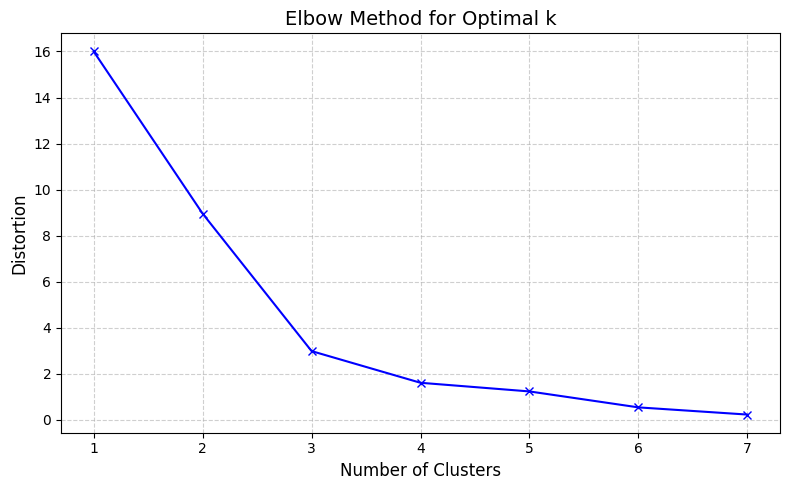

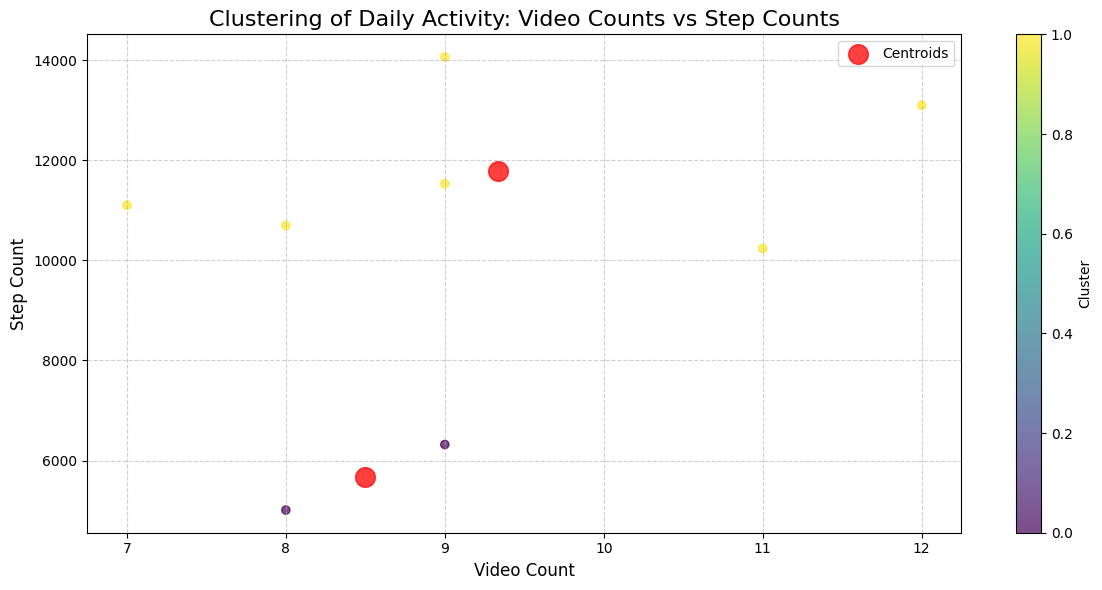

In [78]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Combine daily video counts and step counts to create clustering_data
clustering_data = daily_data[['Video_Count', 'Steps']].dropna()

# 1. Data Scaling
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data[['Video_Count', 'Steps']])

# 2. Determine the Optimal Number of Clusters Using the Elbow Method
distortions = []
K = range(1, min(len(clustering_data), 10))  # Limit the number of clusters based on available data
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Distortion', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 3. K-Means Clustering (Using the Optimal Number of Clusters)
optimal_clusters = 2  # Adjust based on the elbow graph
if optimal_clusters >= len(clustering_data):
    print(f"Optimal cluster count {optimal_clusters} is too high for {len(clustering_data)} samples.")
else:
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    clustering_data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

    # 4. Visualize Clustering Results
    plt.figure(figsize=(12, 6))
    plt.scatter(
        clustering_data['Video_Count'], clustering_data['Steps'],
        c=clustering_data['Cluster'], cmap='viridis', alpha=0.7
    )
    plt.title('Clustering of Daily Activity: Video Counts vs Step Counts', fontsize=16)
    plt.xlabel('Video Count', fontsize=12)
    plt.ylabel('Step Count', fontsize=12)
    plt.colorbar(label='Cluster')

    # Display Cluster Centers
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centroids')
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


 Causal Inference

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Define treatment and control groups
daily_data['Treatment'] = (daily_data['Video_Count'] > 10).astype(int)

# Create a model to calculate propensity scores
X = daily_data[['Steps']]  # Independent variable
y = daily_data['Treatment']  # Treatment group

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate propensity scores using logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_scaled, y)
daily_data['Propensity_Score'] = logistic_model.predict_proba(X_scaled)[:, 1]

# Perform Nearest Neighbor Matching
treated = daily_data[daily_data['Treatment'] == 1]
control = daily_data[daily_data['Treatment'] == 0]

# Use Nearest Neighbors algorithm for matching
nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['Propensity_Score']])
distances, indices = nn.kneighbors(treated[['Propensity_Score']])

# Combine treatment and matched control groups
matched_control = control.iloc[indices.flatten()]
matched_data = pd.concat([treated, matched_control])

# Analyze the difference in step counts
treatment_effect = matched_data[matched_data['Treatment'] == 1]['Steps'].mean() - \
                   matched_data[matched_data['Treatment'] == 0]['Steps'].mean()

print(f"Average Treatment Effect on Steps: {treatment_effect:.2f}")


Average Treatment Effect on Steps: -712.00


The causal inference analysis indicates a negative treatment effect, with an average reduction of 712 steps in the treatment group (those watching more than 10 videos daily) compared to the matched control group. This suggests that higher video consumption may be associated with decreased physical activity levels, highlighting a potential trade-off between screen time and physical activity.

I aslo did a "Topic Modelling" machine learning concept to give me an idea about the contents that ı consume in the exam period.:


<ipython-input-82-2abc7325d636>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Clean_Title'] = filtered_df['Title'].str.lower().str.replace('[^\w\s]', '', regex=True)


Topic 1:
['13', 'büfe', 'tardini', 'week', 'excel', 'görkem', 'kimya', 'şahin', 'organik', '2024']
Topic 2:
['emre', 'bir', 'geometri', 've', '2024', 'yaşar', 'erman', 'wwwbuderscom', 'lineer', 'cebir']
Topic 3:
['full', 'denemesi', 'matematik', 'emre', 'özcan', 'vs', 'showtv', 'kızılcık', 'şerbeti', 'bölüm']


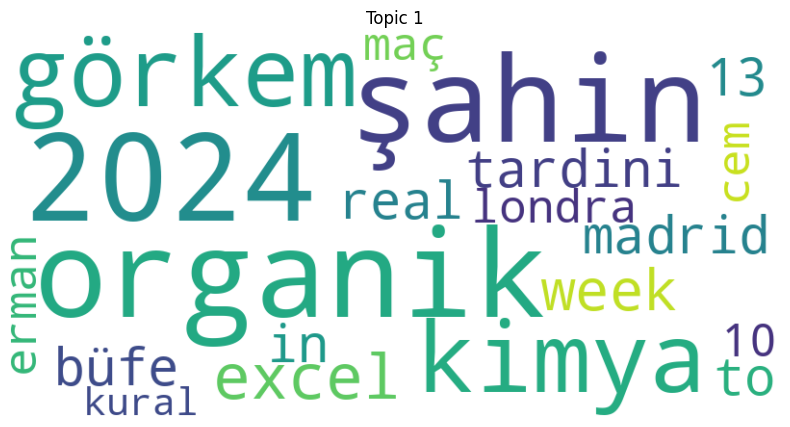

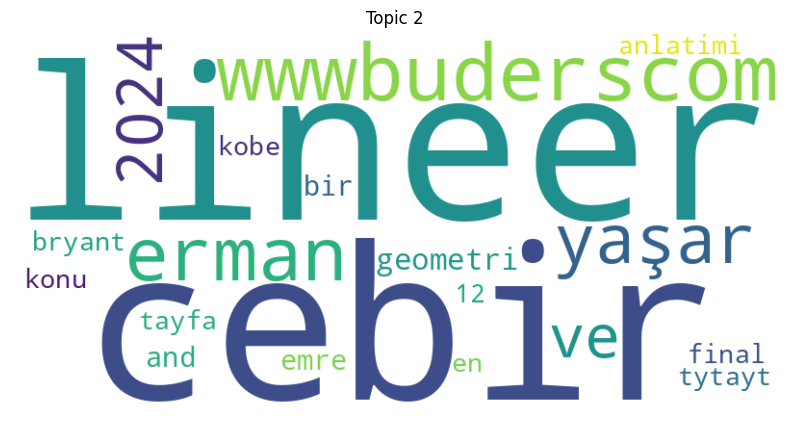

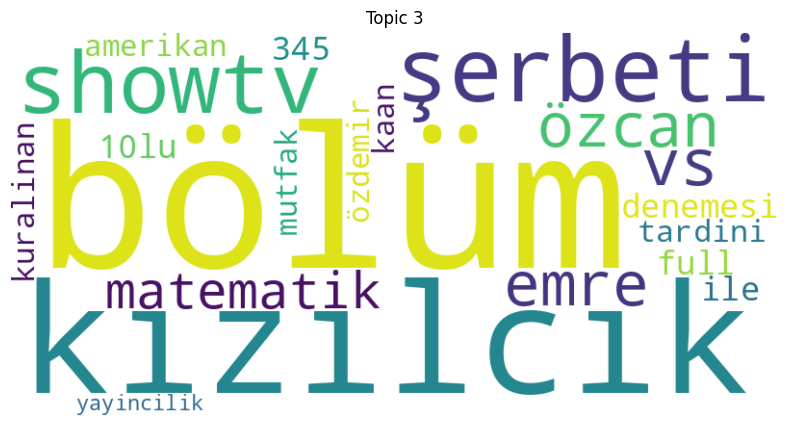

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

# Custom stopword list
custom_stopwords = ['videoyu', 'izlediniz', 'adlı', 'video', 'izle']

# Clean the titles
filtered_df['Clean_Title'] = filtered_df['Title'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Create the word count matrix (using custom stopwords)
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
vectorizer.stop_words = custom_stopwords
X = vectorizer.fit_transform(filtered_df['Clean_Title'])

# Build the LDA model
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
lda_model.fit(X)

# Display topics and the most frequent words
words = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}:")
    print([words[i] for i in topic.argsort()[-10:]])

# Visualize topics using WordCloud
for idx, topic in enumerate(lda_model.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
        {words[i]: topic[i] for i in topic.argsort()[-20:]}
    )
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {idx + 1}")
    plt.show()


Then I tried to do a heatmap about the count steps in the exam periods


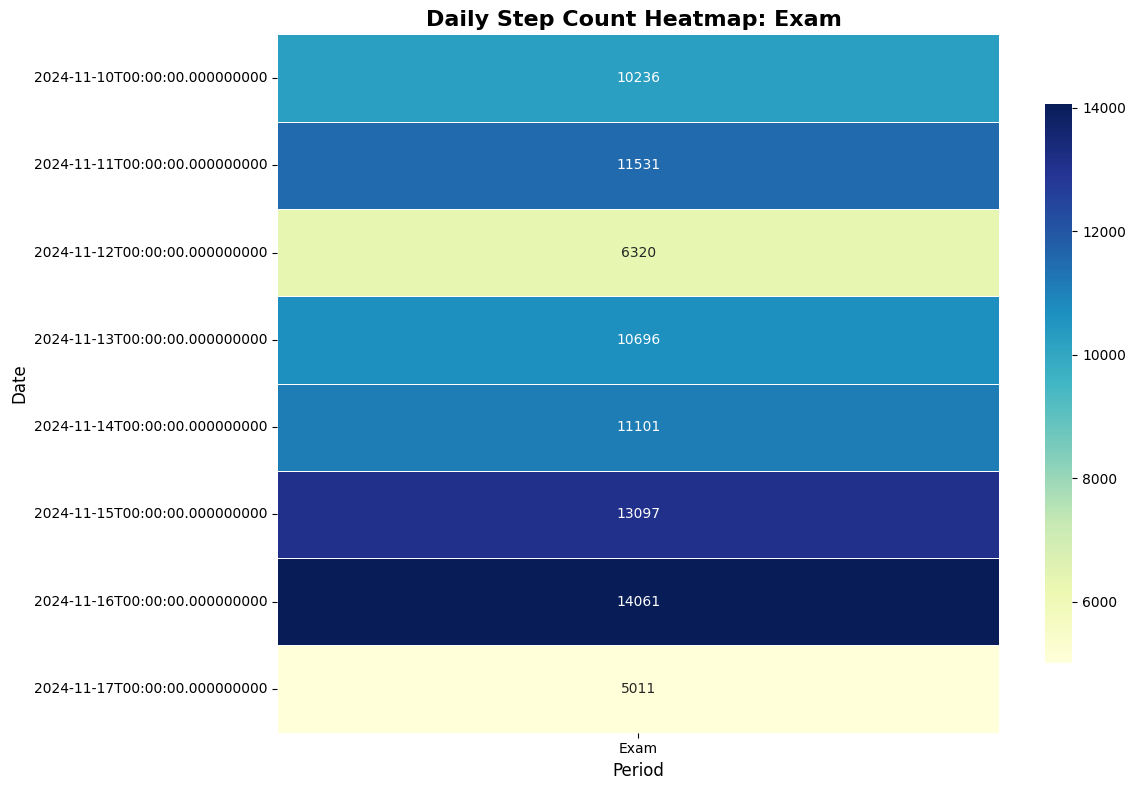

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'daily_data' DataFrame exists
# If missing, create it by merging 'daily_steps' and 'daily_video_counts'
if 'daily_data' not in globals():
    daily_data = daily_steps.merge(daily_video_counts, on='Date', how='inner')

# Create a pivot table (necessary structure for Heatmap)
heatmap_data = daily_data.pivot(index='Date', columns='Adjusted Period', values='Steps')

# Replace NaN values with 0 (optional)
heatmap_data = heatmap_data.fillna(0)

# Create the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    annot=True,
    fmt=".0f",
    linewidths=.5,
    cbar_kws={"shrink": 0.8}  # Shrink the color bar
)
plt.title('Daily Step Count Heatmap: Exam ', fontsize=16, weight='bold')
plt.xlabel('Period', fontsize=12)
plt.ylabel('Date', fontsize=12)
plt.xticks(rotation=0, fontsize=10)  # Keep period labels horizontal
plt.yticks(fontsize=10)  # Adjust date label font size
plt.tight_layout()
plt.show()


As we can see here 2024-11-16 is the highest which was my exam day that ı  indicate before.


Then I created the boxplot the see my count step data.

<ipython-input-124-d074f92c43ca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Period', y='Steps', data=boxplot_data, palette='coolwarm')


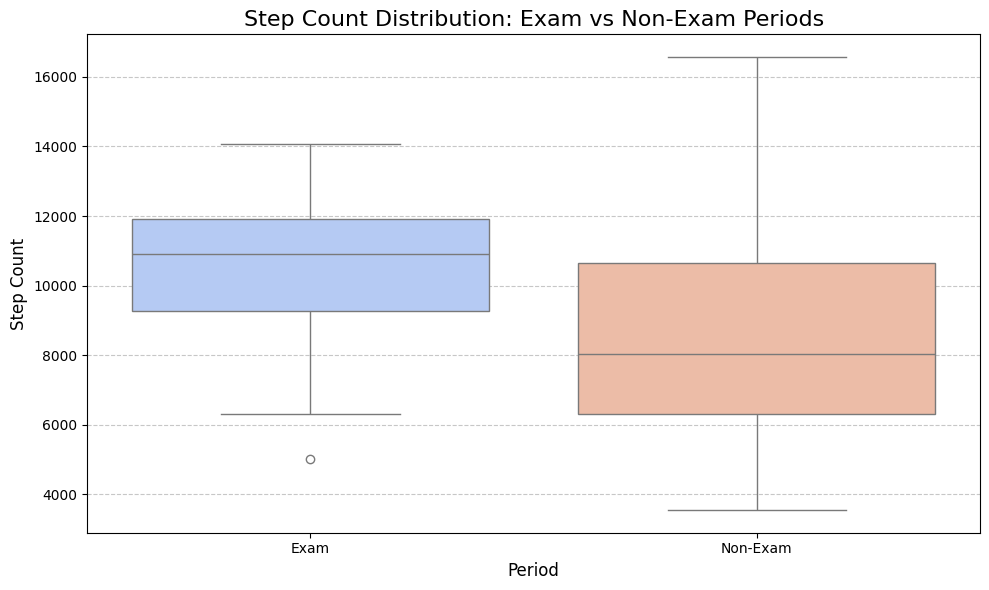

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# determining step count in exam and non-exam times
boxplot_data = daily_steps[daily_steps['Period'].isin(['Exam', 'Non-Exam'])]

# creating boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Period', y='Steps', data=boxplot_data, palette='coolwarm')
plt.title('Step Count Distribution: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Step Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# CORRELATION BETWEEN THE TWO COEFICCIENTS



From now on,we are looking at both step count and youtube usage.Firstly, ı begin with the simple scatter plot the see whether there is any correlation between these two coficcients.

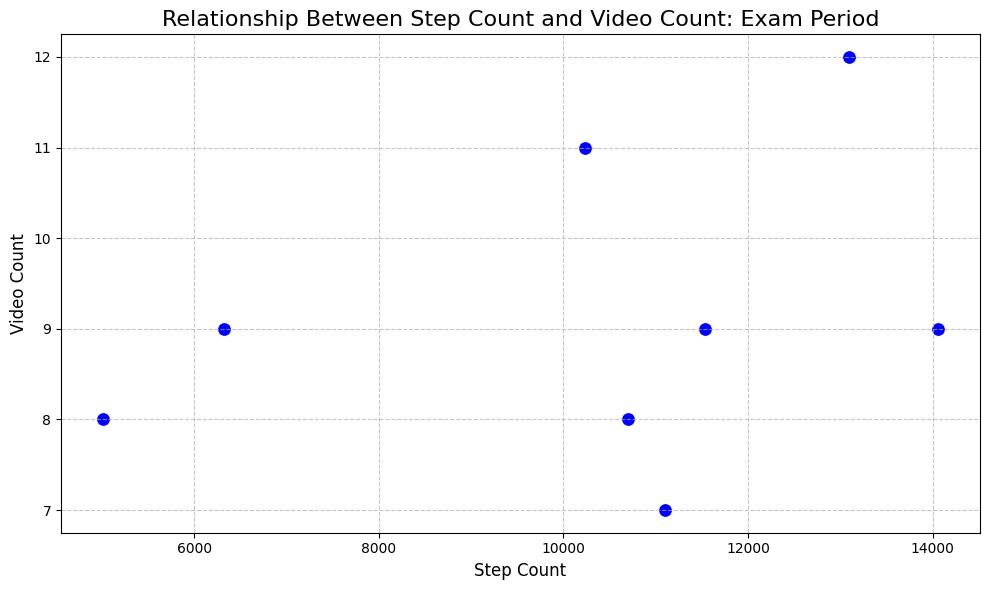

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# just Exam Period data
exam_data = daily_data[daily_data['Adjusted Period'] == 'Exam']

# Scatter Plot: Exam Period
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Steps', y='Video_Count', data=exam_data, color='blue', s=100)
plt.title('Relationship Between Step Count and Video Count: Exam Period', fontsize=16)
plt.xlabel('Step Count', fontsize=12)
plt.ylabel('Video Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


As we can see here there is no such correlation.It seems our hypothesis more likely to wrong but we keep on searching.

Then I calculate simple correlation statistics.

In [66]:
from scipy.stats import pearsonr

# calculate correlation
corr, p_value = pearsonr(daily_data['Video_Count'], daily_data['Steps'])
print(f"Korelasyon Katsayısı (r): {corr}")
print(f"P-değeri: {p_value}")


Korelasyon Katsayısı (r): 0.32351190245230976
P-değeri: 0.434409737465424


Then I did similar scatterplot with trendline.

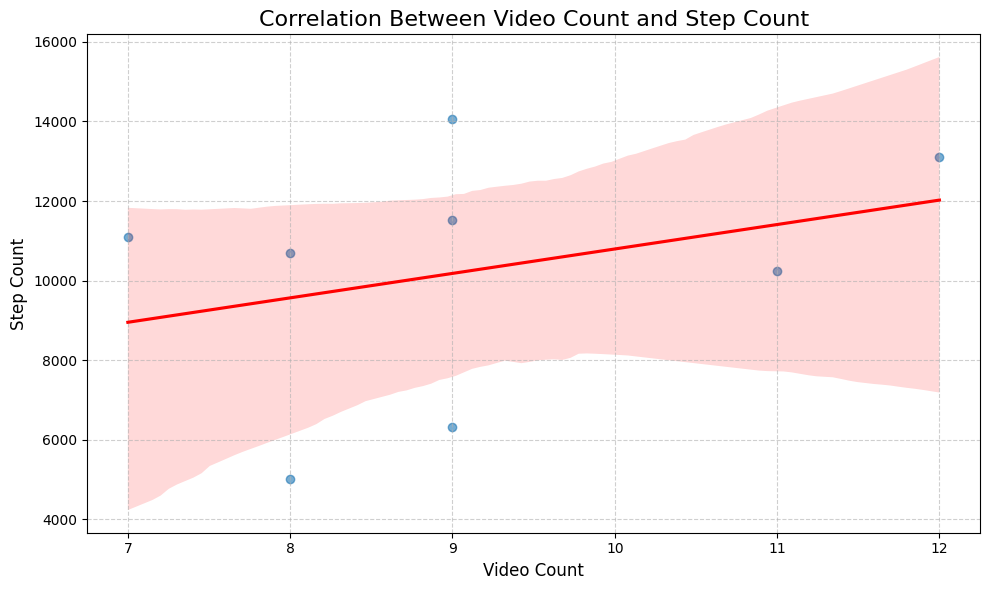

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot and trendline
plt.figure(figsize=(10, 6))
sns.regplot(x='Video_Count', y='Steps', data=daily_data, scatter_kws={'alpha': 0.6}, line_kws={"color": "red"})
plt.title('Correlation Between Video Count and Step Count', fontsize=16)
plt.xlabel('Video Count', fontsize=12)
plt.ylabel('Step Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Then I wanted to look at some descriptive statsitics and correlation heatmap.

<ipython-input-125-a0962f181a1f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_steps['Date'] = pd.to_datetime(filtered_steps['Date'])


        Exam Period  Non-Exam Period
count      8.000000        14.000000
mean   10256.625000      8770.000000
std     3118.723958      3637.881738
min     5011.000000      3550.000000
25%     9257.000000      6297.000000
50%    10898.500000      8025.000000
75%    11922.500000     10638.250000
max    14061.000000     16570.000000


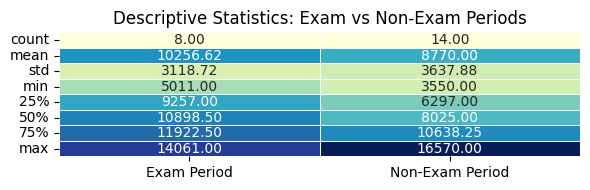


Correlation between Video Count and Steps:
              Video_Count     Steps
Video_Count     1.000000  0.323512
Steps           0.323512  1.000000


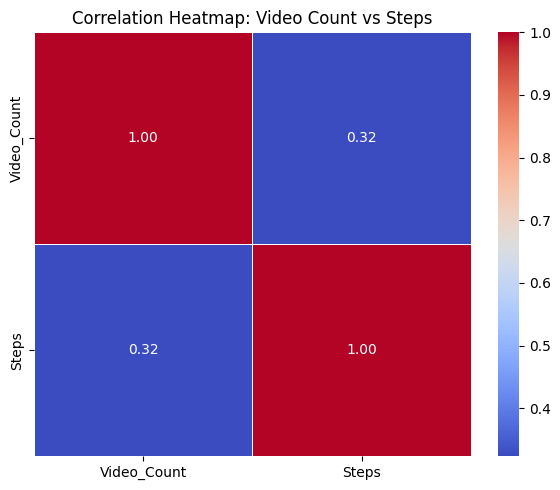

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Date' columns in both DataFrames to datetime format
filtered_steps['Date'] = pd.to_datetime(filtered_steps['Date'])
daily_video_counts['Date'] = pd.to_datetime(daily_video_counts['Date'])

# Merge daily step counts and YouTube video counts
daily_data = filtered_steps.merge(
    daily_video_counts, on='Date', how='inner'
)

# Descriptive statistics for Exam and Non-Exam periods
exam_stats = filtered_steps[filtered_steps['Period'] == 'Exam']['Steps'].describe()
non_exam_stats = filtered_steps[filtered_steps['Period'] == 'Non-Exam']['Steps'].describe()

# Create a table for descriptive statistics
desc_stats_df = pd.DataFrame({
    'Exam Period': exam_stats,
    'Non-Exam Period': non_exam_stats
})
print(desc_stats_df)

# Plot descriptive statistics as a table
plt.figure(figsize=(6, 2))
sns.heatmap(desc_stats_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False, linewidths=0.5)
plt.title('Descriptive Statistics: Exam vs Non-Exam Periods', fontsize=12)
plt.tight_layout()
plt.show()

# Correlation between daily video counts and step counts
correlation = daily_data[['Video_Count', 'Steps']].corr()
print("\nCorrelation between Video Count and Steps:\n", correlation)

# Plot the correlation as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Video Count vs Steps', fontsize=12)
plt.tight_layout()
plt.show()


Then Finally maybe the most important part for accepting any correlation or causation for some kind of events.I wanted to use "Hypothesis Testing"

First ı sperate the exam period in the data and exclude all other unnecessary parts.

In [126]:
import pandas as pd
from scipy.stats import ttest_ind

# Exam period dates
exam_start = pd.to_datetime('2024-11-10')
exam_end = pd.to_datetime('2024-11-17')

# Redefine the Non-Exam period to include all dates from the last 3 months excluding the exam period
three_months_ago = daily_steps['Date'].max() - pd.Timedelta(days=90)

daily_steps['Period'] = daily_steps['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else
              ('Non-Exam' if x >= three_months_ago else 'Exclude')
)

# Check the number of data points for each period
print(daily_steps['Period'].value_counts())

# Check the dates for Exam and Non-Exam periods
exam_dates = daily_steps[daily_steps['Period'] == 'Exam']['Date']
non_exam_dates = daily_steps[daily_steps['Period'] == 'Non-Exam']['Date']

print("Exam Period Dates:", list(exam_dates))
print("Non-Exam Period Dates:", list(non_exam_dates))


Period
Exclude     2803
Non-Exam      83
Exam           8
Name: count, dtype: int64
Exam Period Dates: [Timestamp('2024-11-10 00:00:00'), Timestamp('2024-11-11 00:00:00'), Timestamp('2024-11-12 00:00:00'), Timestamp('2024-11-13 00:00:00'), Timestamp('2024-11-14 00:00:00'), Timestamp('2024-11-15 00:00:00'), Timestamp('2024-11-16 00:00:00'), Timestamp('2024-11-17 00:00:00')]
Non-Exam Period Dates: [Timestamp('2024-09-24 00:00:00'), Timestamp('2024-09-25 00:00:00'), Timestamp('2024-09-26 00:00:00'), Timestamp('2024-09-27 00:00:00'), Timestamp('2024-09-28 00:00:00'), Timestamp('2024-09-29 00:00:00'), Timestamp('2024-09-30 00:00:00'), Timestamp('2024-10-01 00:00:00'), Timestamp('2024-10-02 00:00:00'), Timestamp('2024-10-03 00:00:00'), Timestamp('2024-10-04 00:00:00'), Timestamp('2024-10-05 00:00:00'), Timestamp('2024-10-06 00:00:00'), Timestamp('2024-10-07 00:00:00'), Timestamp('2024-10-08 00:00:00'), Timestamp('2024-10-09 00:00:00'), Timestamp('2024-10-10 00:00:00'), Timestamp('2024-10-11 

But first ı should determine my hypothesis for these test.

Null Hypothesis(h0)=There is no significant difference in the average step counts between the Exam and Non-Exam periods.
Alternative Hypothesis(hA)=There is a significant difference in the average step counts between the Exam and Non-Exam periods.

Now ı can calculate the values as follows:

In [128]:
from scipy.stats import ttest_ind

# Filter step counts for Exam and Non-Exam periods
exam_steps = daily_steps[daily_steps['Period'] == 'Exam']['Steps']
non_exam_steps = daily_steps[daily_steps['Period'] == 'Non-Exam']['Steps']

# Perform T-Test
t_stat, p_value = ttest_ind(exam_steps, non_exam_steps, equal_var=False)

# Print the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Hypothesis test evaluation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


T-Statistic: 0.15387648286535555
P-Value: 0.8810481604744103
Fail to reject the null hypothesis


from these values we fail to reject null hypothesis because it is bigger than 0.05

There is no statistically significant difference in step counts between Exam and Non-Exam periods. This means that, based on the data, we cannot conclude that the average step counts differ during these two periods.